Cryptography

Tagging along with Polylog and ChatGPT

References:

[I can prove I’ve solved this Sudoku without revealing it - Polylog](https://youtu.be/Otvcbw6k4eo?si=0PMUnGsDrkqXEeVc)

Tutor:

OpenAI's ChatGPT

Zero-knowledge proofs (ZKPs) are cryptographic methods that allow one party (the *prover*) to convince another party (the *verifier*) that a statement is true, without revealing any additional information beyond the validity of the statement itself. The key idea is that the verifier learns nothing about the statement except its truth, ensuring privacy and security.

Here’s a high-level summary:

1. **Purpose**: To prove knowledge of a fact without revealing the fact itself. For example, proving that you know a password without actually showing it.
  
2. **Main Components**:
   - **Prover**: The party that has the knowledge and wants to prove it.
   - **Verifier**: The party that checks the validity of the proof.
   - **Challenge and Response**: The prover and verifier engage in an interaction where the prover provides cryptographic evidence that the claim is true, and the verifier checks this evidence.

3. **Properties of ZKPs**:
   - **Completeness**: If the statement is true, an honest prover can convince the verifier.
   - **Soundness**: If the statement is false, a dishonest prover cannot convince the verifier.
   - **Zero-knowledge**: The verifier learns nothing about the statement except that it's true.

4. **Applications**:
   - **Privacy**: Ensures that sensitive information (like passwords or transaction details) is not exposed.
   - **Blockchain**: Used for privacy-preserving features in cryptocurrencies (e.g., zk-SNARKs in Zcash).
   - **Authentication**: Enables authentication without revealing personal data.

ZKPs are a powerful tool for ensuring privacy and security in various cryptographic systems.

<ipython-input-1-2c503174e9d3>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('tab10', 3), node_size=800, font_size=12, font_weight='bold')


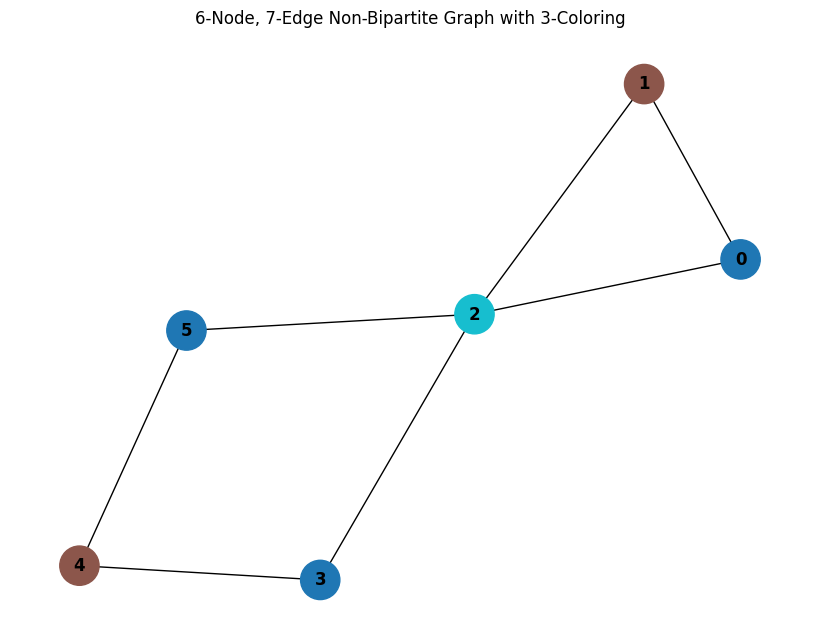

Node color assignment:
Node 0 -> Color 0
Node 1 -> Color 1
Node 2 -> Color 2
Node 3 -> Color 0
Node 4 -> Color 1
Node 5 -> Color 0


In [ ]:
# Made by OpenAI's ChagGPT

import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Create a graph with 6 nodes and 7 edges
G = nx.Graph()

# Add 6 nodes
G.add_nodes_from(range(6))

# Add 7 edges, creating a non-bipartite graph (which means it must contain an odd-length cycle)
edges = [
    (0, 1), (1, 2), (2, 0),  # triangle (odd cycle)
    (2, 3), (3, 4), (4, 5), (5, 2)  # more edges forming an additional cycle
]
G.add_edges_from(edges)

# Step 2: Color the graph with 3 colors, ensuring no two adjacent nodes share the same color
# We can use a simple greedy coloring algorithm
color_map = {}
for node in G.nodes():
    # Find the colors of the neighbors
    neighbor_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
    # Assign the smallest available color
    for color in range(3):  # We have three colors (0, 1, 2)
        if color not in neighbor_colors:
            color_map[node] = color
            break

# Step 3: Visualize the graph
# Create a list of node colors based on the color_map
node_colors = [color_map[node] for node in G.nodes()]

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('tab10', 3), node_size=800, font_size=12, font_weight='bold')
plt.title("6-Node, 7-Edge Non-Bipartite Graph with 3-Coloring")
plt.show()

# Output the color assignment for each node
print("Node color assignment:")
for node, color in color_map.items():
    print(f"Node {node} -> Color {color}")




### ZKP Concept for Graph Coloring
In this context, the prover will prove to the verifier that they know a valid 3-coloring of the graph without revealing the actual colors. The protocol follows these steps:

1. **Commitment Phase:**  
   - The prover permutes the colors (to avoid revealing the original mapping).
   - The prover commits to each node's color using a cryptographic hash function.

2. **Challenge Phase:**  
   - The verifier randomly selects an edge from the graph and asks the prover to reveal the colors of the two nodes at the ends of that edge.

3. **Response Phase:**  
   - The prover reveals the colors for the challenged edge.
   - The verifier checks that the revealed colors are different and match the original commitments.

### Explanation of the ZKP Process in the Code

✅ **Commitment Phase:**  
- The `permuted_colors` dictionary randomizes the original colors (shifted by 1 or 2) to conceal the true colors.  
- Each permuted color is then hashed and stored in `commitments`.

✅ **Challenge Phase:**  
- The verifier randomly selects an edge from the graph.

✅ **Response Phase:**  
- The prover reveals the permuted colors for the two nodes in the chosen edge.

✅ **Verification:**  
- The verifier checks if the revealed colors are distinct, proving the coloring's validity without revealing the actual colors.


<ipython-input-2-bf69f1c4298f>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('tab10', 3), node_size=800, font_size=12, font_weight='bold')


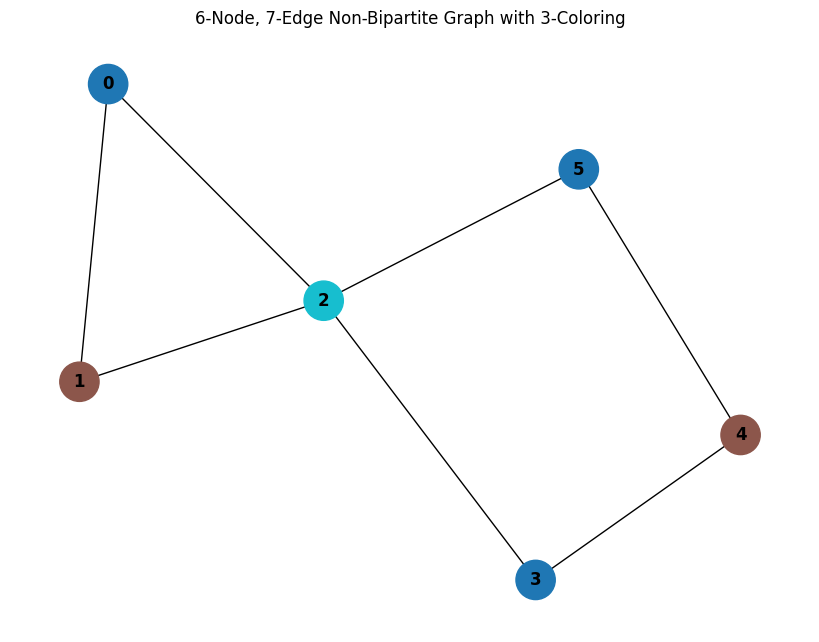

Node color assignment:
Node 0 -> Color 0
Node 1 -> Color 1
Node 2 -> Color 2
Node 3 -> Color 0
Node 4 -> Color 1
Node 5 -> Color 0
Verifier challenges edge: (1, 2)
Prover reveals: {1: 2, 2: 0}
Verification successful: The two nodes have different colors.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import hashlib

# Step 1: Create a graph with 6 nodes and 7 edges
G = nx.Graph()
G.add_nodes_from(range(6))
G.add_edges_from([(0, 1), (1, 2), (2, 0), (2, 3), (3, 4), (4, 5), (5, 2)])

# Step 2: Color the graph with 3 colors
color_map = {}
for node in G.nodes():
    neighbor_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
    for color in range(3):
        if color not in neighbor_colors:
            color_map[node] = color
            break

# Step 3: Visualize the graph
node_colors = [color_map[node] for node in G.nodes()]
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('tab10', 3), node_size=800, font_size=12, font_weight='bold')
plt.title("6-Node, 7-Edge Non-Bipartite Graph with 3-Coloring")
plt.show()

print("Node color assignment:")
for node, color in color_map.items():
    print(f"Node {node} -> Color {color}")

# Step 4: Zero Knowledge Proof (ZKP) Component
# Prover's Commitment Phase
permuted_colors = {node: (color + random.randint(1, 2)) % 3 for node, color in color_map.items()}
commitments = {node: hashlib.sha256(str(permuted_colors[node]).encode()).hexdigest() for node in G.nodes()}

# Verifier Challenge Phase
edge = random.choice(list(G.edges))
print(f"Verifier challenges edge: {edge}")

# Prover's Response Phase
revealed_colors = {node: permuted_colors[node] for node in edge}
print(f"Prover reveals: {revealed_colors}")

# Verifier's Check
if revealed_colors[edge[0]] != revealed_colors[edge[1]]:
    print("Verification successful: The two nodes have different colors.")
else:
    print("Verification failed: The two nodes have the same color.")
